**Bayesian Bandits**

We implement a bayesian Reinforcement Learning algorithm. Suppose you are at the casino and in some of bandits (slot machines) there is a higher probability of winning. We aim to find the bandit in which we are more likely to win. For example, take four bandits that have $p=[0.2, \, 0.4, \, 0.6, \, 0.8]$ as winning probabilities.

The aim is to find the winning rate of each bandit. We can use Bayes theorem and aim to find the posterior probability
\begin{equation}
p(\theta |X) = \frac{p(X|\theta) \, p(\theta)}{p(X)},
\end{equation}
where $X$ is the data collected and we aim to find the parameter $\theta$. If the prior is a Beta distribution and the likelihood is a Binomial then it can be shown that the posterior will also be a Beta distribution. Therefore, the Beta distribution is the conjugate distribution of the Binomial distribution
\begin{align} 
& {\rm If} \hspace{0.3cm} p(\theta)  = {\rm Beta}(\alpha, \beta) \nonumber \\
& \implies p(\theta |X)   = {\rm Beta}\left(\alpha + \sum_{i=1}^N x_i , \, \beta +N - \sum_{i=1}^N x_i\right). \nonumber
\end{align}
The number of wins are added to the parameter $\alpha$ while the number of losses are added to $\beta$.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# General parameters:
num_trials = 2500                       # Total number of experiments
bandit_probs = [0.2, 0.4, 0.6, 0.8]     # Win probabilities for each of the bandits (slot machines)

class Bandit:
  # We set a=b=1 since it gives the uniform distribution as the starting distribution
  def __init__(self, p):
    self.p = p
    self.a = 1    
    self.b = 1
    self.N = 0   

  # The output is either 0 or 1:
  def pull(self):
    return np.random.random() < self.p

  # Beta is the conjugate pair of the Binomial distribution
  # Beta gives the distribution for the mean
  def sample(self):
    return np.random.beta(self.a, self.b) 

# We update the parameters a and b
  def update(self, x):
    self.a += x
    self.b += 1-x
    self.N += 1

# Function that plots the distribution functions
def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label=f"real p: {b.p:.1f}, win rate = {b.a - 1}/{b.N}", lw=2)
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()

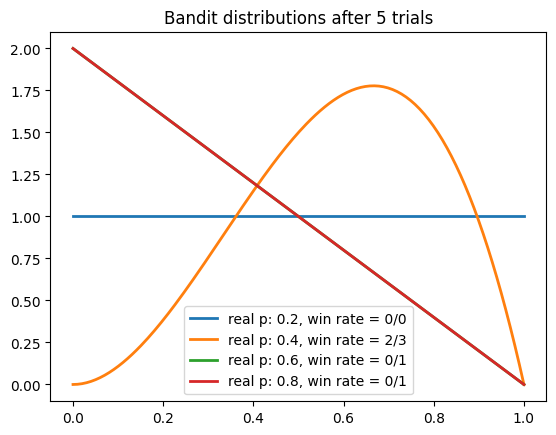

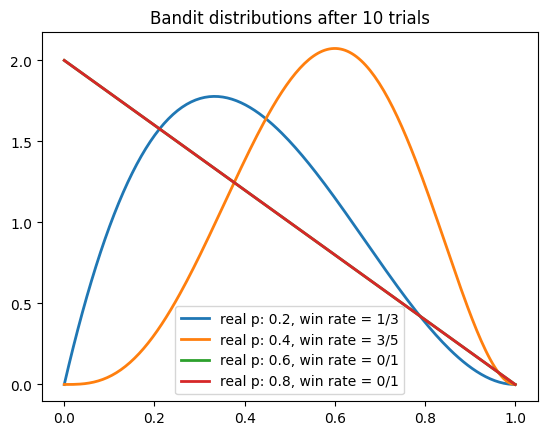

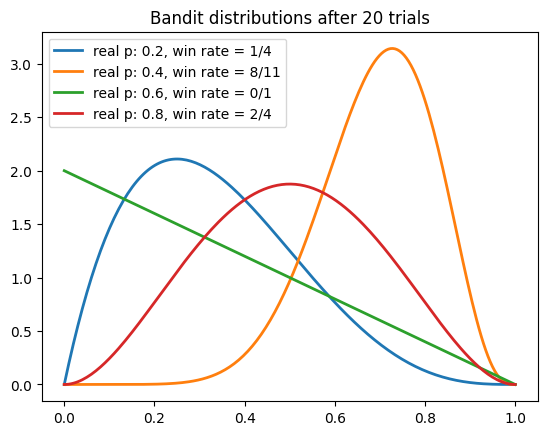

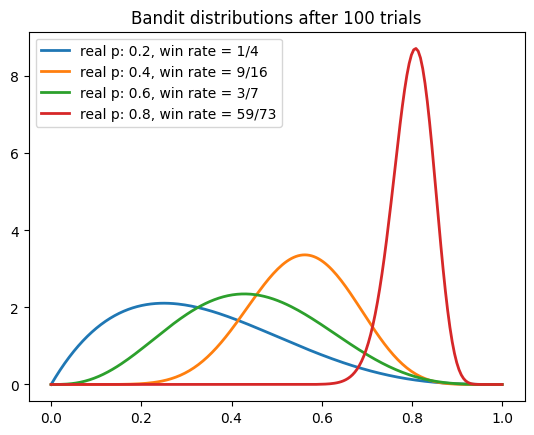

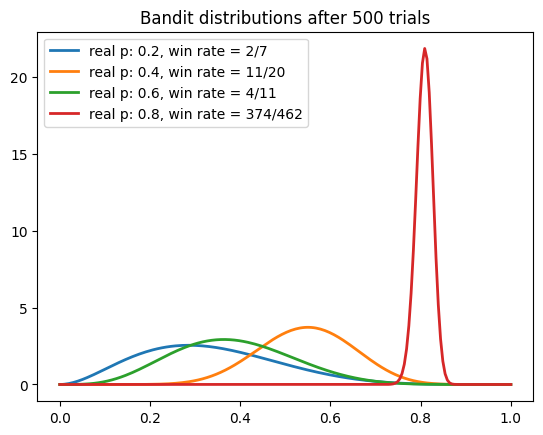

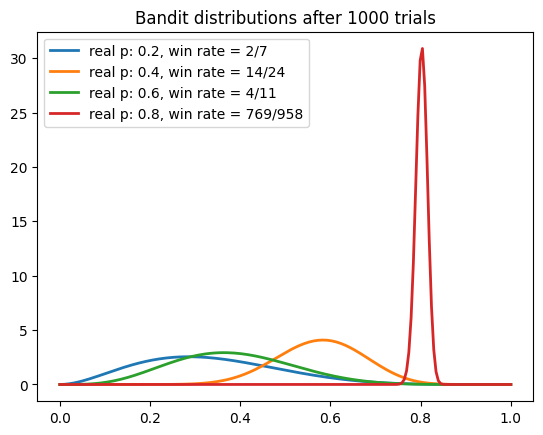

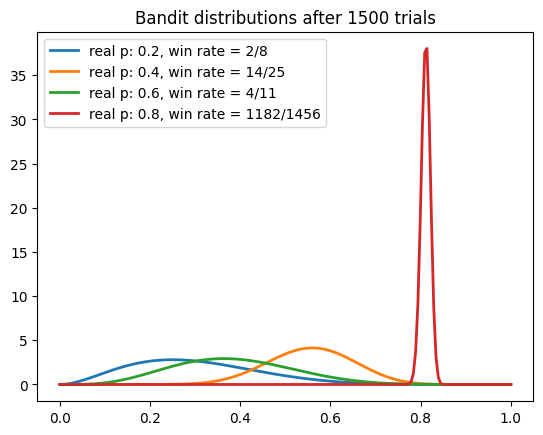

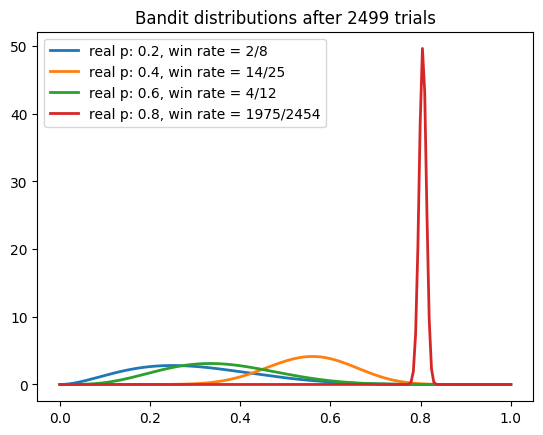

Total reward earned: 1995.0
Overall win rate: 0.798
Number of times each bandit was played: [8, 25, 12, 2455]


In [7]:
# We initialize  the variables
bandits = [Bandit(p) for p in bandit_probs]
sample_points = [5, 10, 20, 100, 500, 1000, 1500, 2499]
rewards = np.zeros(num_trials)

for i in range(num_trials):
  # Thompson sampling. Choose bandit with largest output from Beta distribution
  j = np.argmax([b.sample() for b in bandits])

  # Plot the posterior probability distributions
  if i in sample_points:
    plot(bandits, i)

  # Pull the arm for the bandit with the largest sample
  x = bandits[j].pull()

  # Update rewards
  rewards[i] = x

  # Update the distribution for the bandit whose arm we just pulled
  bandits[j].update(x)

# Print total reward
print("Total reward earned:", rewards.sum())
print("Overall win rate:", rewards.sum()/num_trials)
print("Number of times each bandit was played:", [b.N for b in bandits])
